In [1]:
from EmuLP import Filter, Template, Cosmology, Extinction, Galaxy
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import json
import pandas as pd

In [2]:
cosmos_filt_dir = os.path.abspath('./LEPHARE/filt')
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb",\
                                                                      "vista/Y.lowres",\
                                                                      "vista/J.lowres",\
                                                                      "vista/H.lowres",\
                                                                      "vista/K.lowres",\
                                                                      "cosmos/IB427.lowres",\
                                                                      "cosmos/IB464.lowres",\
                                                                      "cosmos/IB484.lowres",\
                                                                      "cosmos/IB505.lowres",\
                                                                      "cosmos/IB527.lowres",\
                                                                      "cosmos/IB574.lowres",\
                                                                      "cosmos/IB624.lowres",\
                                                                      "cosmos/IB679.lowres",\
                                                                      "cosmos/IB709.lowres",\
                                                                      "cosmos/IB738.lowres",\
                                                                      "cosmos/IB767.lowres",\
                                                                      "cosmos/IB827.lowres",\
                                                                      "cosmos/NB711.lowres",\
                                                                      "cosmos/NB816.lowres",\
                                                                      "vista/NB118.lowres",\
                                                                      "cosmos/irac_ch1.lowres",\
                                                                      "cosmos/irac_ch2.lowres",\
                                                                      "cosmos/irac_ch3.lowres",\
                                                                      "cosmos/irac_ch4.lowres"]
                   ]
N_FILT=len(cosmos_filt_list)
N_FILT

30

In [3]:
filt_trans_type = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
assert len(filt_trans_type)==N_FILT
print(len(filt_trans_type))


30


In [4]:
filt_dict = {}
for filt, trans_typ in zip(cosmos_filt_list, filt_trans_type):
    folder, file = filt.split('/')[-2:]
    name=folder+"_"+file.split('.')[0]
    if trans_typ == 1:
        transm = "photons"
    else:
        transm = "energy"
    filt_dict[name] = {"path" : filt, "transmission" : transm}
filt_dict

{'cosmos_u_cfht': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_cfht.lowres',
  'transmission': 'photons'},
 'cosmos_u_new': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_new.pb',
  'transmission': 'photons'},
 'hsc_gHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb',
  'transmission': 'photons'},
 'hsc_rHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/rHSC.pb',
  'transmission': 'photons'},
 'hsc_iHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/iHSC.pb',
  'transmission': 'photons'},
 'hsc_zHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/zHSC.pb',
  'transmission': 'photons'},
 'hsc_yHSC': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/yHSC.pb',
  'transmission': 'photons'},
 'vista_Y': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/Y.lowres',
  'transmission': 'photons'},
 'vista_J': {'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/vista/J.lowres',
  'transmission': 'photons'},
 'vista_H': {'path': '/home/joseph/Pho

In [5]:
test_key = 'hsc_gHSC'
test_filt = Filter.Filter(test_key, filt_dict[test_key]["path"], filt_dict[test_key]["transmission"])

In [6]:
test_filt

<Filter object : name=hsc_gHSC ; path=/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb>

In [7]:
print(test_filt)

hsc_gHSC filter, from file : /home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb.


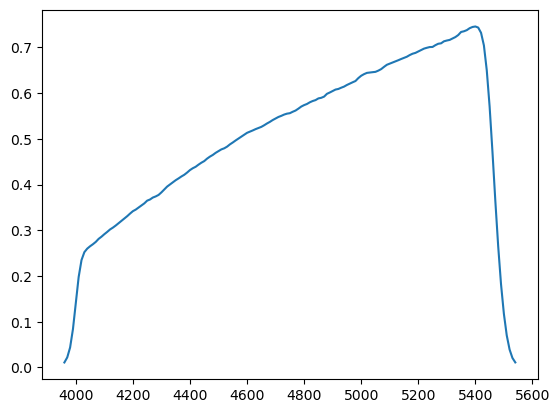

In [8]:
plt.plot(test_filt.wavelengths, test_filt.transmit)

In [9]:
np.trapz(test_filt.transmit, test_filt.wavelengths)

789.3310455941148

In [10]:
test_filt.mean_wl

4815.86385739943

In [11]:
sed_file=os.path.abspath("./lephare_cosmos/SED_FORS2_KinCalClus_SL_v5.list")
sed_list = []
with open(sed_file, 'r') as seds:
    for sed in seds:
        if sed[0] == "#":
            pass
        else:
            sed_list.append(os.path.abspath(os.path.join('./LEPHARE/sed/GAL', sed[:-1])))
sed_list

['/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id226.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id227.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id451.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id714.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE

In [12]:
sed_dict = {}
for sed in sed_list:
    file = sed.split('/')[-1]
    attrs = file.split("_")
    if attrs[0] == "AVG":
        name="_".join(attrs[:4])
    else:
        name="_".join(attrs[2:4])+"-"+(attrs[-1]).split('.')[0]
    sed_dict[name] = sed
sed_dict

{'AVG_CLUST_CWW_Sbc': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
 'AVG_CLUST_CWW_E': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
 'AVG_CLUST_CWW_Im': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
 'AVG_CLUST_CWW_Scd': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
 'AVG_CLUST_KIN_Sb': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
 'AVG_CLUST_KIN_Sa': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
 'CWW_Sbc-id226': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id226.sed',
 'CWW_Sbc-id227': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/Zsup1_CLUST_CWW_Sbc_ext_id227.sed',
 'CWW_Sbc-id451': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5

# Sequential test of the main code

In [13]:
conf_json = os.path.abspath('./EmuLP/COSMOS2020-with-FORS2.json')
with open(conf_json, "r") as inpfile:
        inputs = json.load(inpfile)
lcdm = Cosmology.Cosmology(inputs['Cosmology']['h0'], inputs['Cosmology']['om0'], inputs['Cosmology']['l0'])
print(lcdm)
print(f"The Universe was {lcdm.time(1100):.0f} years old at CMB emission.")
print(f"The Universe is {lcdm.time(0):.0f} years old now.")

LCDM cosmology with h0=70.0 ; Om0=0.3 ; l0=0.7.
The Universe was 465531 years old at CMB emission.
The Universe is 13471095764 years old now.


In [14]:
templates_dict = inputs['Templates']
z_grid = np.arange(inputs['Z_GRID']['z_min'], inputs['Z_GRID']['z_max']+inputs['Z_GRID']['z_step'], inputs['Z_GRID']['z_step'])
wl_grid = np.arange(inputs['WL_GRID']['lambda_min'], inputs['WL_GRID']['lambda_max']+inputs['WL_GRID']['lambda_step'], inputs['WL_GRID']['lambda_step'])
extlaws_dict = inputs['Extinctions']
extlaws_arr = np.array( [ Extinction.Extinction(key, extlaws_dict[key]) for key in extlaws_dict.keys() ] )

filters_dict = inputs['Filters']
filters_arr = np.array( [ Filter.Filter(key, filters_dict[key]["path"], filters_dict[key]["transmission"]) for key in filters_dict.keys() ] )
N_FILT = len(filters_arr)

df_filters = Filter.to_df(filters_arr, wl_grid, inputs["save results"], f"{inputs['run name']}_filters")

In [15]:
df_filters

,cosmos_u_cfht,cosmos_u_new,hsc_gHSC,hsc_rHSC,hsc_iHSC,hsc_zHSC,hsc_yHSC,vista_Y,vista_J,vista_H,...,cosmos_IB738,cosmos_IB767,cosmos_IB827,cosmos_NB711,cosmos_NB816,vista_NB118,cosmos_irac_ch1,cosmos_irac_ch2,cosmos_irac_ch3,cosmos_irac_ch4
100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.0, 1.1)

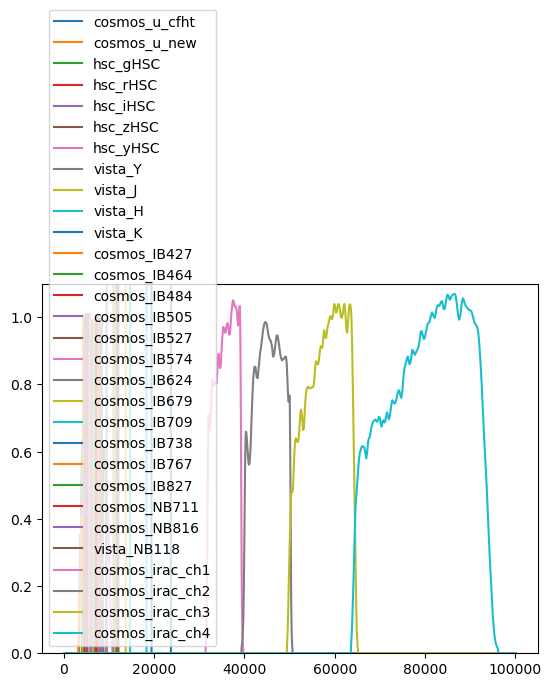

In [18]:
df_filters.plot()
plt.ylim(0., 1.1)
#plt.xlim(0., 100000.)

In [20]:
templates_arr = np.array([])

for temp_key in templates_dict:
    template = Template.Template(temp_key, templates_dict[temp_key])
    for extinction in extlaws_arr:
        for ebv in inputs['e_BV']:
            template.apply_extinc(extinction, ebv)
            for redshift in z_grid:
                template.to_redshift(redshift, lcdm)
                template.normalize(1000., 10000.)
                #print(np.trapz(filters_arr[0].f_transmit(template.wavelengths), template.wavelengths))
                template.fill_magnitudes(filters_arr)
                #print(template.magnitudes)
                templates_arr = np.append(templates_arr, template)

estim_method = inputs['Estimator']
if estim_method.lower() == 'chi2':
    zp_estim = Estimator.Chi2(estim_method, templates_arr)
else:
    raise RuntimeError(f"Unimplemented estimator {estim_method}.\nPlease specify one of the following: chi2, <more to come>.")

/home/joseph/PhotoZ_PhD/EmuLP/Template.py:62: RuntimeWarning: invalid value encountered in divide
  self.spec_norm = self.lumins / self.norm


NameError: name 'Estimator' is not defined